# Primera simulación

En esta primera simulación se pretende trabajar con el modelo de un canal de espacio libre, es decir, vacío, para transimitir información. Para ello, se toma como referencia el modelo planteado en el libro `Principles of Digital Communication, a Top-Down Approach`, de Bixio Rimoldi. Este modelo está en la página 119.

## Modelo de canal

Se parte de que la potencia recibida por una antena es modelada por la ecuación siguiente:

$$
P_R = \frac{P_T G_T G_R}{(\frac{4\pi d}{\lambda})^2}
$$

Tomando entonces los valores obtenidos de la antena receptora de un SDR y de la antena transmisora de la CoNAE se tiene:

- $P_T=18.8 \ [W]$
- $ G_T = 575.44 $
- $ G_R = 1380000 $

La distancia es variable, dependiendo de la ubicación de las antenas y del punto en donde se está realizando la medición.

La longitud de onda de una onda electromagnética se calcula mediante la siguiente expresión:

$$
\lambda = \frac{c_0}{f}
$$

con $c_0$ siendo la velocidad de propagación de la luz en el vacío. La frecuencia a utilizar es la propia de la banda L, es decir, $2 \ GHz$. Con ello, se calcula $\lambda=15 \ cm$.


## Simulación

Para la simulación propiamente dicha, se pretende crear un campo con la forma de un cuadrado, de $1 \ Km$ de extensión, con una resolución de 10 puntos por metro. Se definirán arbitrariamente las posiciones de 2 antenas, que emitirán con la longitud de onda anteriormente calculada, y con los parámetros propios del modelo de canal presente en el libro.

Se calculará la superposición de los efectos de cada una de las antenas en la potencia recibida en un determinado punto del espacio a través de la expresión de $P_R$ vista antes.

### Código de Python 3

Se importan las librerías a utilizar.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plotnine import ggplot, aes, geom_tile, ggtitle, xlab, ylab

Se definen las constantes:

In [18]:
pt = 18.8
gt = 1
gr = 1
lda = 0.15

Se definen las dimensiones del campo y la resolución con la que se trabajará.

In [19]:
long = 1000
width = 1000
res = 1

Se crea una malla de puntos.

In [20]:
longDots = long*res
widthDots = width*res
x = np.linspace(0,long,longDots)
y = np.linspace(0,width,widthDots)
#y = np.zeros(1000)
xx,yy = np.meshgrid(x,y)
dots = np.vstack((xx.ravel(),yy.ravel())).T

Se define una hipotética ubicación de las dos antenas.

In [26]:
ant1 = (700,432)
ant2 = (1000,0)

Se declaran las funciones que modelan la potencia recibida a partir de los parámetros de las antenas 1 y 2. Se tiene como dato el valor de coordenada x e y del punto a analizar. Se plantea la atenuación en dB con respecto a los 18.8W transmitidos en un inicio desde la antena.

In [22]:
def powerAnt1(x, y):
    d = np.sqrt((x - ant1[0]) ** 2 + (y - ant1[1]) ** 2)
    pr = pt + 20 * np.log10(lda) - 20 * np.log10(4 * np.pi * d)
    return pr

def powerAnt2(x, y):
    d = np.sqrt((x - ant2[0]) ** 2 + (y - ant2[1]) ** 2)
    pr = pt + 20 * np.log10(lda) - 20 * np.log10(4 * np.pi * d)
    return pr

Se calcula entonces la potencia recibida en cada punto del plano.

In [27]:
power = powerAnt1(dots[:,0],dots[:,1])#+powerAnt2(dots[:,0],dots[:,1])

El mapa de calor se grafica.

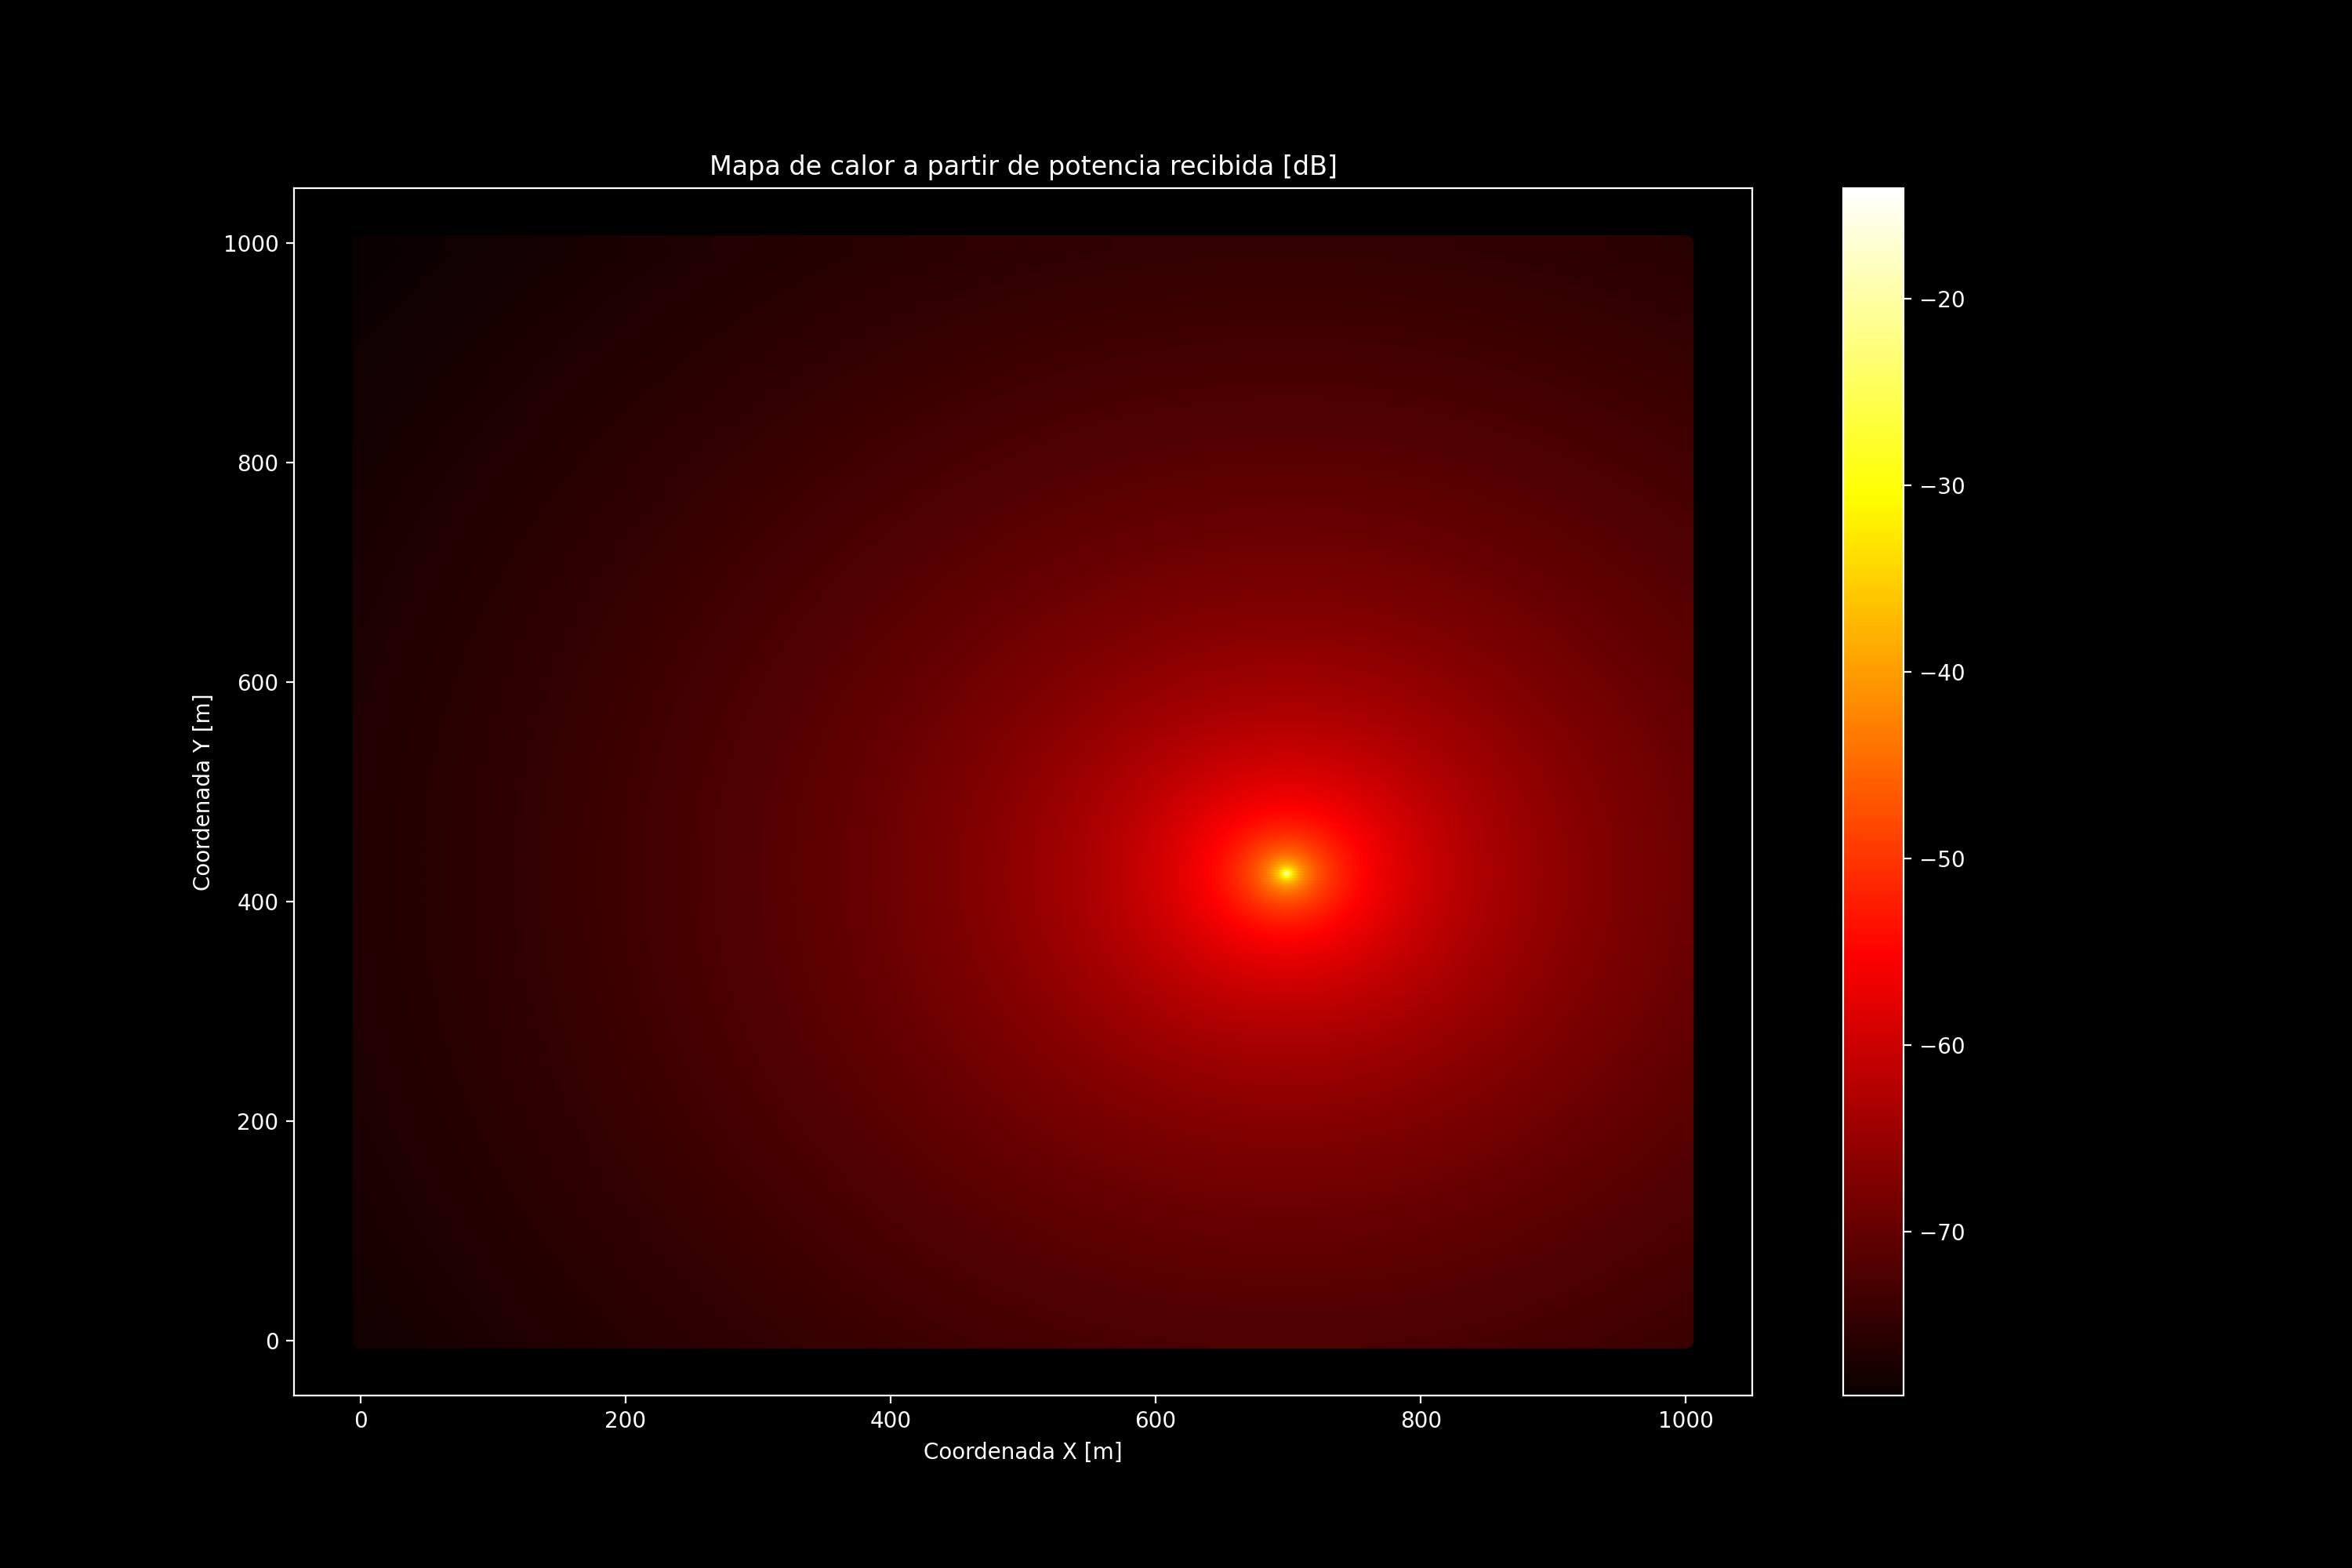

In [28]:
plt.figure(figsize=(15,10))
plt.scatter(dots[:,0],dots[:,1],c=power,cmap='hot')
plt.colorbar()
plt.title('Mapa de calor a partir de potencia recibida [dB]')
plt.xlabel('Coordenada X [m]')
plt.ylabel('Coordenada Y [m]')
plt.show()

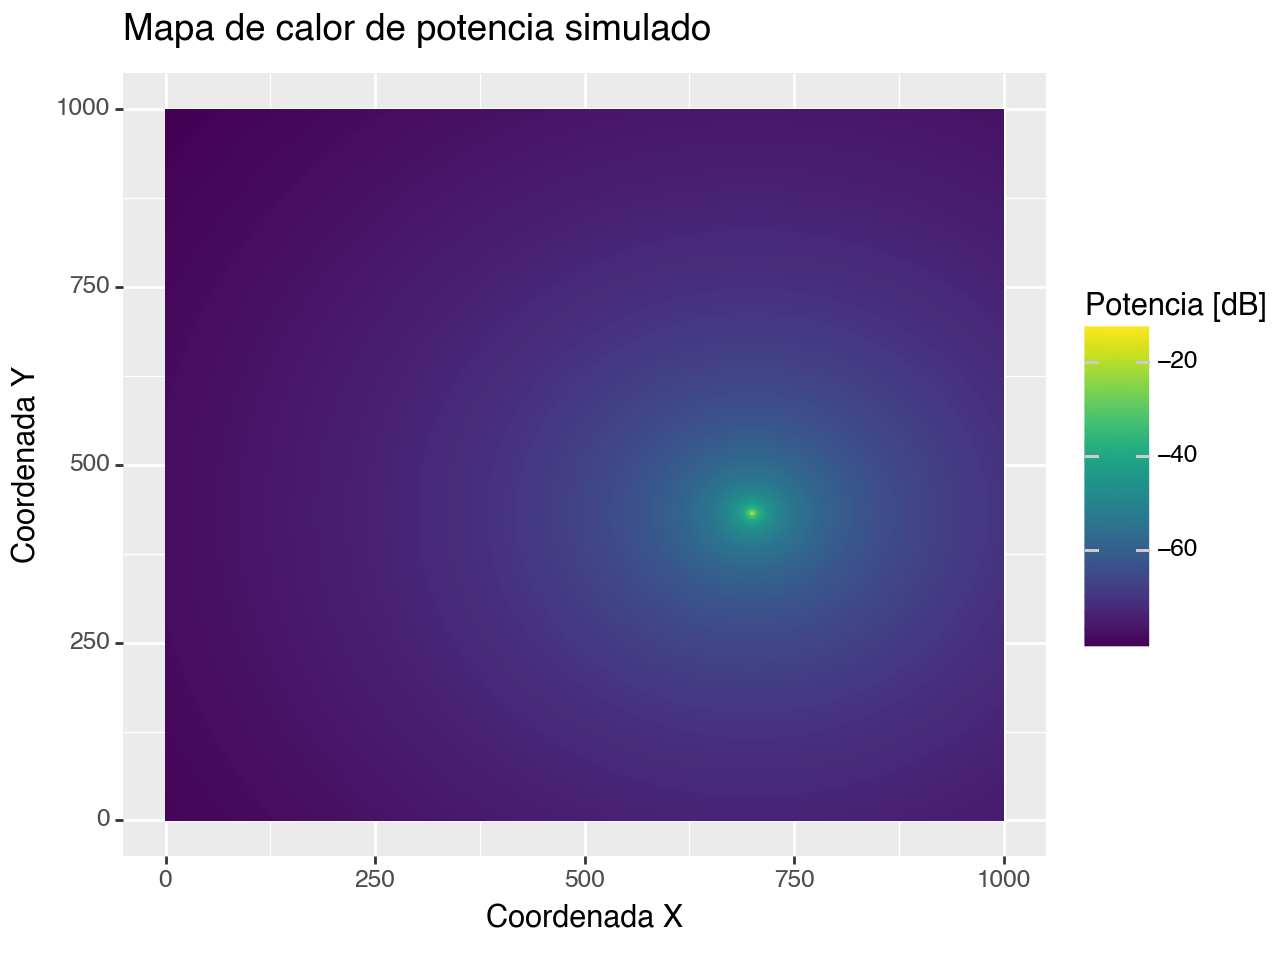

<Figure Size: (640 x 480)>

In [29]:
df = pd.DataFrame({'x': dots[:, 0], 'y': dots[:, 1], 'Potencia [dB]': power})
ggplot(df, aes(x='x', y='y', fill='Potencia [dB]')) + geom_tile() + ggtitle('Mapa de calor de potencia simulado') + xlab('Coordenada X') + ylab('Coordenada Y')